Code inspired from **Deep Learning: An Introductionfor Applied Mathematicians** <br>
https://epubs.siam.org/doi/10.1137/18M1165748

In [1]:
import torch
import torch.nn as nn

import numpy as np

from matplotlib import pyplot as plt

In [2]:
x = torch.tensor([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7],
                  [0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
y = torch.tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])
print(x)
print(y)

tensor([[0.1000, 0.3000, 0.1000, 0.6000, 0.4000, 0.6000, 0.5000, 0.9000, 0.4000,
         0.7000],
        [0.1000, 0.4000, 0.5000, 0.9000, 0.2000, 0.3000, 0.6000, 0.2000, 0.4000,
         0.6000]])
tensor([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])


In [3]:
x = torch.transpose(x,0,1)
y = torch.transpose(y,0,1)
print(x)
print(y)

tensor([[0.1000, 0.1000],
        [0.3000, 0.4000],
        [0.1000, 0.5000],
        [0.6000, 0.9000],
        [0.4000, 0.2000],
        [0.6000, 0.3000],
        [0.5000, 0.6000],
        [0.9000, 0.2000],
        [0.4000, 0.4000],
        [0.7000, 0.6000]])
tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1]])


In [4]:
def cost(y_hat,y):
    return torch.mean(torch.pow(y - y_hat,2))

In [5]:
torch.manual_seed(5000)
model = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,3),
        nn.Sigmoid(),
        nn.Linear(3,2),
        nn.Sigmoid(),    
)

In [6]:
eta      = 0.05  # learning rate
Niter    = int(1e6)  # number of SG iterations
savecost = []  # value of cost function at each iteration

In [7]:
optimizer = torch.optim.SGD(model.parameters(),
                              lr=eta)

In [8]:
for counter in range(Niter):
    k       = np.random.randint(10)  # choose a training point at random
    xx      = x[k]
    y_hat   = model(xx)
    newcost = cost(y_hat,y[k]) 
    optimizer.zero_grad() # to make the gradients zero
    newcost.backward() # This is for computing gradients using backward propagation
    optimizer.step() #
    savecost.append(newcost.item())
    if counter%100000==0:
        print(newcost.item())

0.24410422146320343
0.004476325120776892
0.001167617621831596
0.000531283556483686
0.0001319508592132479
1.658444759300437e-08
1.2633670110062667e-08
6.233961903490126e-05
0.00012122467160224915
3.130199388579058e-08


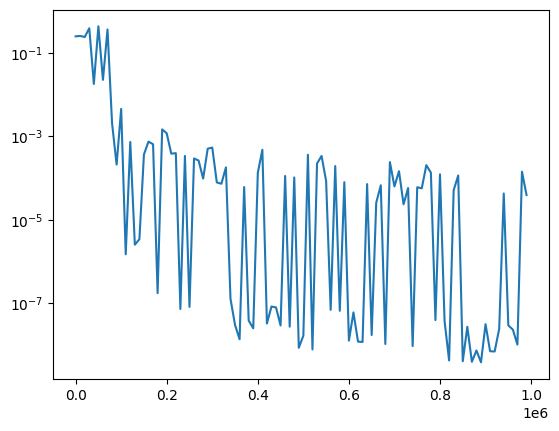

In [9]:
plt.semilogy(range(0, Niter, int(1e4)), savecost[::int(1e4)])
plt.show()

**Results**

(-0.1, 1.1)

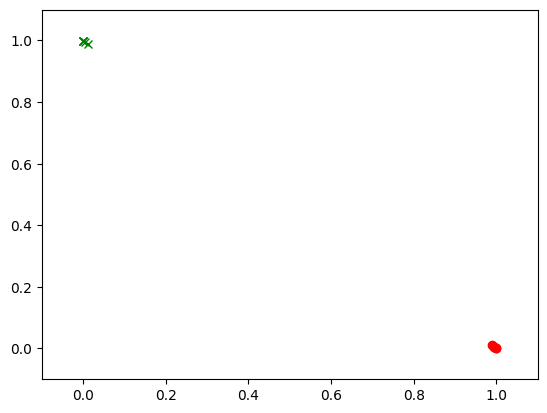

In [28]:
for i in range(5):
    plt.plot(model(x[i]).detach().numpy()[0],model(x[i]).detach().numpy()[1],'ro')
for i in range(5,10):
    plt.plot(model(x[i]).detach().numpy()[0],model(x[i]).detach().numpy()[1],'gx')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)